In [1]:
import numpy
import importlib
from algebra import *
from camera import *
import cena as cn
from img360 import *
from luz import *
import sys

#### recompilar modulos

In [2]:
import objetos as obj

import material as mt
importlib.reload(obj) 
importlib.reload(cn) 

<module 'cena' from '/Users/pedrogomes/Mestrado/CG/trabalho3/cena.py'>

## Cria objetos

#### Criando esfera

In [56]:
amarelo = Vector3.create(0.7,0.7,0.)
branco = Vector3.create(1,1,1)
verde = Vector3.create(0.3, 1, 0.3)
azul = Vector3.create(0.3, 0.3, 1)
vermelho = Vector3.create(1, 0.3, 0.3)


In [71]:
# criado o material da esfera e caixa
mat_caixa = mt.Material(amarelo, branco, 40, None, 0.0)
mat_esfera = mt.Material(azul, branco, 50, None, 0.5)

#### Criando esfera

In [72]:
centro = np.array(Vector3.create(0,20,0))
raio = 25.0
esfera = obj.Esfera(centro, raio, mat_esfera)

esfera.show()

Esfera: origem:[ 0. 20.  0.], raio:25.0


#### Criando cubo

In [73]:
pmin1 = Vector3.create(-80.0, -50.0, -50.0)
pmax1 = Vector3.create(50.0, -45.0, 50.0)

caixa1 = obj.Cubo(pmin1, pmax1, [mat_caixa]*6)

pmin2 = Vector3.create(-80.0, -50.0, -60.0)
pmax2 = Vector3.create(50.0, 50.0, -50.0)
caixa2 = obj.Cubo(pmin2, pmax2, [mat_caixa]*6)


## Cria camera

In [74]:
path = './'
img_name ='Sunset_Southside_Slopes_Pittsburgh_Equirectangular_Panoramic.jpg'
fname = path+img_name
img360 = Img360(fname)

eye = Vector3.create(100,40,40)
at = Vector3.create(0,0,0)
up = Vector3.create(0,0,1)


camera = Camera(90,600,600,30,230, eye, at, up, img360)


posicao_luz = Vector3.create(100,40,40)
luz = Luz(posicao_luz, branco)

In [75]:
objetos_na_cena = []
objetos_na_cena.append(esfera)
objetos_na_cena.append(caixa1)
objetos_na_cena.append(caixa2)

cena = cn.Cena(camera, objetos_na_cena, [luz])

In [76]:
#buffer = cena.move_camera([-1,-1.0,0])
buffer = cena.render()

## Mostra render

In [77]:
import matplotlib.pyplot as plt

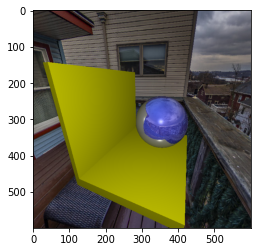

In [78]:
plt.imshow(buffer)